# Clasificación

Importamos todas las librerías que vamos a utilizar   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importamos el data set de vuelta

In [2]:
ds_properati = pd.read_csv('nuevo_dataset_properati.csv')
ds_properati.drop(columns=['Unnamed: 0', "geometry"], inplace=True)
ds_properati.head() 

,created_on,latitud,longitud,provincia,barrio,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency
0,2021-09-09,-34.631621,-58.416825,Capital Federal,BOEDO,Venta,PH,4.0,2.0,109.394701,73.0,250000.0,USD
1,2021-09-09,-34.623886,-58.412746,Capital Federal,BOEDO,Venta,PH,2.0,1.0,61.000000,46.0,100000.0,USD
2,2021-09-09,-34.625588,-58.423056,Capital Federal,BOEDO,Venta,PH,4.0,2.0,104.000000,54.0,185000.0,USD
3,2021-09-09,-34.629398,-58.425852,Capital Federal,BOEDO,Venta,Departamento,2.0,1.0,62.000000,44.0,100000.0,USD
4,2021-09-09,-34.626595,-58.420019,Capital Federal,BOEDO,Venta,PH,4.0,3.0,111.000000,101.0,110000.0,USD


#### Construcción del target

Para esta sección crearemos una nueva variable tipo_precio que tendrá tres categorías: alto, medio, bajo. Esta nueva variable será nuestra clase en el problema de clasificación. Para determinar cuando el tipo_precio de una propiedad es alto, medio o bajo se deberá analizar el precio por metro cuadrado (pxm2).

Se divide a la variable en un número específico de bins
Los criterios de agrupamiento pueden ser por ejemplo:
● Igual-Frecuencia: La misma cantidad de observaciones en un bin
● Igual-Ancho: Definimos rangos o intervalos de clases para cada bin
● Cuantiles: Separar en intervalos utilizando Mediana, Cuantiles, Percentiles.

Creamos una nueva columna precio por metro cuadrado en el dataframe.

In [3]:
ds_properati["precio_metro_cuadrado"] = ds_properati["property_price"] / ds_properati["property_surface_total"]
ds_properati.head()

,created_on,latitud,longitud,provincia,barrio,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,precio_metro_cuadrado
0,2021-09-09,-34.631621,-58.416825,Capital Federal,BOEDO,Venta,PH,4.0,2.0,109.394701,73.0,250000.0,USD,2285.302650
1,2021-09-09,-34.623886,-58.412746,Capital Federal,BOEDO,Venta,PH,2.0,1.0,61.000000,46.0,100000.0,USD,1639.344262
2,2021-09-09,-34.625588,-58.423056,Capital Federal,BOEDO,Venta,PH,4.0,2.0,104.000000,54.0,185000.0,USD,1778.846154
3,2021-09-09,-34.629398,-58.425852,Capital Federal,BOEDO,Venta,Departamento,2.0,1.0,62.000000,44.0,100000.0,USD,1612.903226
4,2021-09-09,-34.626595,-58.420019,Capital Federal,BOEDO,Venta,PH,4.0,3.0,111.000000,101.0,110000.0,USD,990.990991


Ahora la discretizamos en 3 intervalos de igual cantidad de observaciones.

In [4]:
ds_discreto = ds_properati.loc[:,"precio_metro_cuadrado"]

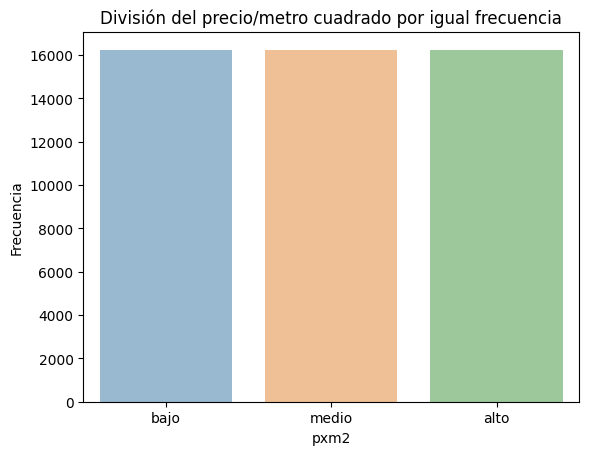

In [5]:
labels=["bajo","medio","alto"]
def dist_equitativa(dataframe):
    dataframe["pxm2_igual_frec"] = pd.qcut(dataframe["precio_metro_cuadrado"],q=3, labels=labels)

    ds_bygroup = dataframe.groupby(['pxm2_igual_frec']).count()  

    eje_x = ds_bygroup.index.tolist()  
    eje_y = ds_bygroup['precio_metro_cuadrado'].tolist()  

    sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_bygroup ,alpha=0.5).set(title="División del precio/metro cuadrado por igual frecuencia",ylabel='Frecuencia',xlabel='pxm2')
    plt.show()
    return dataframe
dataframe_copy = ds_properati.copy()
dataframe_equitativa = dist_equitativa(dataframe_copy)

Ahora dividimos en 3 intervalos, el primero con el 25% de las observaciones,
el siguiente con el 50% y el último con el 25% de las observaciones restantes.


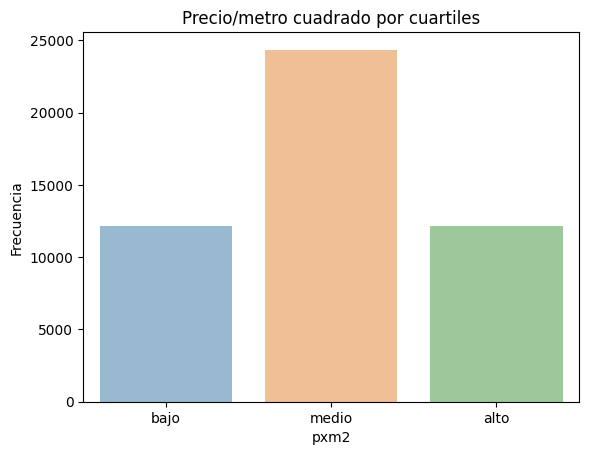

In [6]:
labels=["bajo","medio","alto"]
dataframe = ds_properati.copy()

def dist_25_50_25(dataframe, description):
    dataframe["pxm2_25_50_25"]=pd.qcut(dataframe["precio_metro_cuadrado"],q=[0,0.25,0.75,1], labels=labels)

    #Gráfico de barras con Seaborn
    ds_bygroup=dataframe.groupby(['pxm2_25_50_25']).count()  #Calculo la frecuencia de cada categoría

    eje_x = ds_bygroup.index.tolist()   ## Declaramos valores para el eje x
    eje_y = ds_bygroup['precio_metro_cuadrado'].tolist()  ## Declaramos valores para el eje y

    sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_bygroup ,alpha=0.5).set(title=description,ylabel='Frecuencia',xlabel='pxm2')
    plt.show()
    return dataframe
    
dataframe = ds_properati.copy()
dataframe_20_50_25 = dist_25_50_25(dataframe, "Precio/metro cuadrado por cuartiles")

Ahora vamos a filtrar por tipo de propiedad y luego dividir como en el punto anterior.

Primero con la propiedad de Departamento

Mostramos la distribución equitativa del tipo departamento

/tmp/ipykernel_1877/2984446388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_igual_frec"] = pd.qcut(dataframe["precio_metro_cuadrado"],q=3, labels=labels)


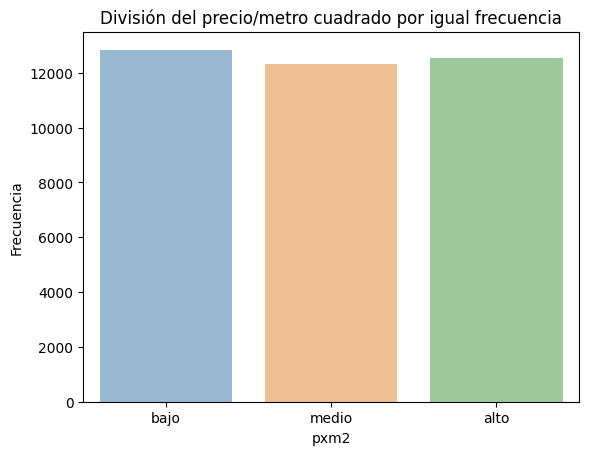

,created_on,latitud,longitud,provincia,barrio,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,precio_metro_cuadrado,pxm2_igual_frec
3,2021-09-09,-34.629398,-58.425852,Capital Federal,BOEDO,Venta,Departamento,2.0,1.0,62.0,44.0,100000.0,USD,1612.903226,bajo
8,2021-09-09,-34.548194,-58.469051,Capital Federal,NUÑEZ,Venta,Departamento,2.0,1.0,37.0,33.0,79000.0,USD,2135.135135,medio
9,2021-09-09,-34.549491,-58.457491,Capital Federal,NUÑEZ,Venta,Departamento,2.0,1.0,102.0,88.0,220000.0,USD,2156.862745,medio
10,2021-09-09,-34.541616,-58.473377,Capital Federal,NUÑEZ,Venta,Departamento,2.0,1.0,48.0,40.0,107000.0,USD,2229.166667,medio
11,2021-09-09,-34.557302,-58.468573,Capital Federal,NUÑEZ,Venta,Departamento,1.0,1.0,44.0,38.0,104000.0,USD,2363.636364,medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48708,2021-01-05,-34.614232,-58.479161,Capital Federal,VILLA SANTA RITA,Venta,Departamento,1.0,1.0,37.0,31.0,74500.0,USD,2013.513514,medio
48709,2021-01-05,-34.614312,-58.479095,Capital Federal,VILLA SANTA RITA,Venta,Departamento,1.0,1.0,51.0,30.0,75500.0,USD,1480.392157,bajo
48710,2021-01-05,-34.614175,-58.479062,Capital Federal,VILLA DEL PARQUE,Venta,Departamento,1.0,1.0,51.0,30.0,75500.0,USD,1480.392157,bajo
48711,2021-01-05,-34.614175,-58.479062,Capital Federal,VILLA DEL PARQUE,Venta,Departamento,1.0,1.0,37.0,31.0,74500.0,USD,2013.513514,medio


In [7]:
ds_properati_depto = ds_properati.loc[ds_properati["property_type"]=="Departamento"]
dist_equitativa(ds_properati_depto)

Mostramos la distribución 25_50_25 del tipo departamento

/tmp/ipykernel_1877/3344619508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_25_50_25"]=pd.qcut(dataframe["precio_metro_cuadrado"],q=[0,0.25,0.75,1], labels=labels)


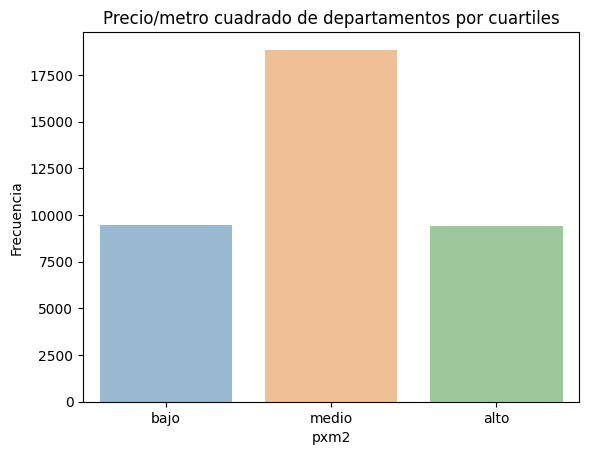

In [8]:
ds_properati_depto = ds_properati.loc[ds_properati["property_type"]=="Departamento"]
dataframe_depto_25_50_25 = dist_25_50_25(ds_properati_depto,"Precio/metro cuadrado de departamentos por cuartiles")

Procedemos a mostrar la distribución de precio por metro cuadrado

/tmp/ipykernel_1877/3344619508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_25_50_25"]=pd.qcut(dataframe["precio_metro_cuadrado"],q=[0,0.25,0.75,1], labels=labels)


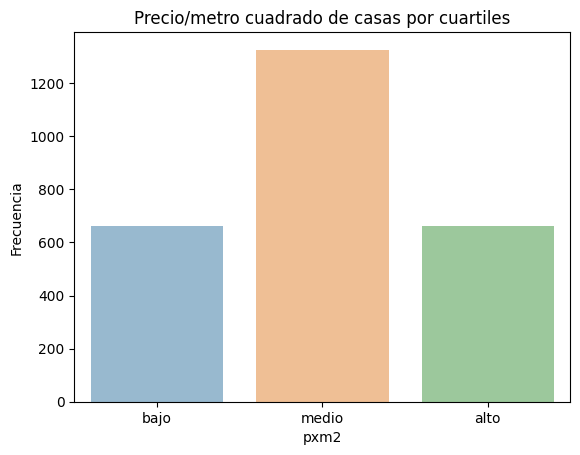

In [9]:
ds_properati_casa = ds_properati.loc[ds_properati["property_type"]=="Casa"]
dataframe_casa_25_50_25 = dist_25_50_25(ds_properati_casa, "Precio/metro cuadrado de casas por cuartiles")

/tmp/ipykernel_1877/3344619508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_25_50_25"]=pd.qcut(dataframe["precio_metro_cuadrado"],q=[0,0.25,0.75,1], labels=labels)


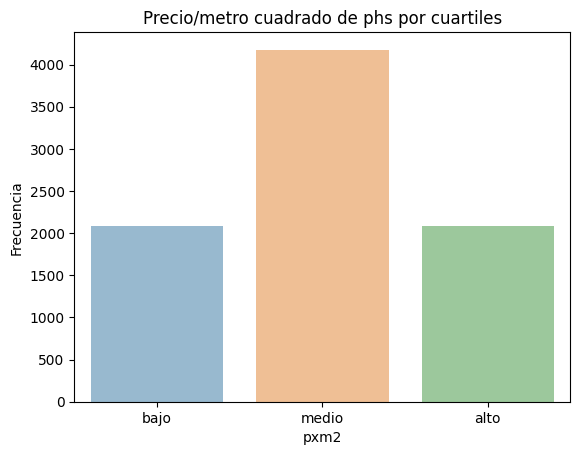

In [10]:
ds_properati_ph = ds_properati.loc[ds_properati["property_type"]=="PH"]
dataframe_ph_25_50_25 = dist_25_50_25(ds_properati_ph, "Precio/metro cuadrado de phs por cuartiles")

Mostramos la distribución del precio por metro cuadrado de todo el database:

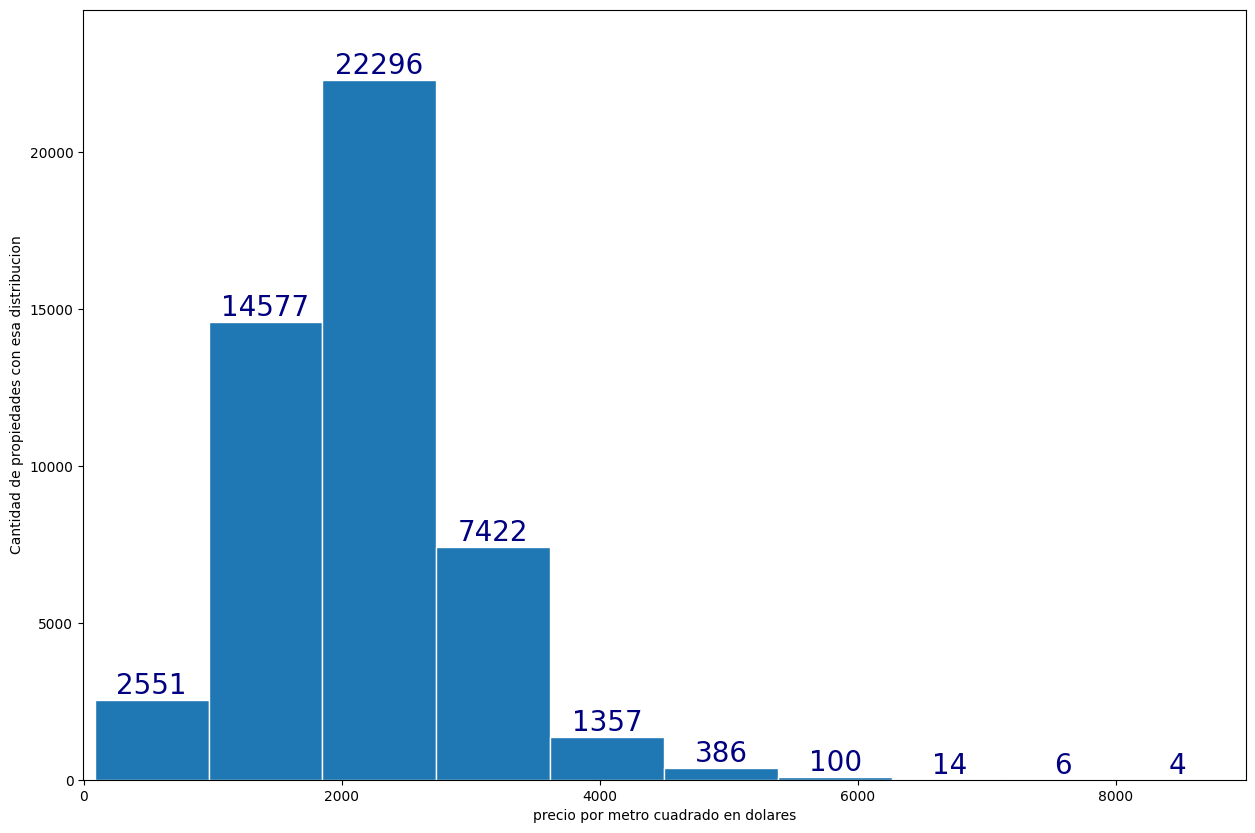

In [11]:

plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(ds_properati['precio_metro_cuadrado'], edgecolor='white')
plt.xlabel("precio por metro cuadrado en dolares")
plt.ylabel("Cantidad de propiedades con esa distribucion")
plt.title = ('Distribucion precio por metro cuadrado todo dataset')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()


Ahora mostramos la distribución del precio por metro cuadrado especificando el tipo de propiedad

1-Distribución de precio por metro cuadrado de departamentos:

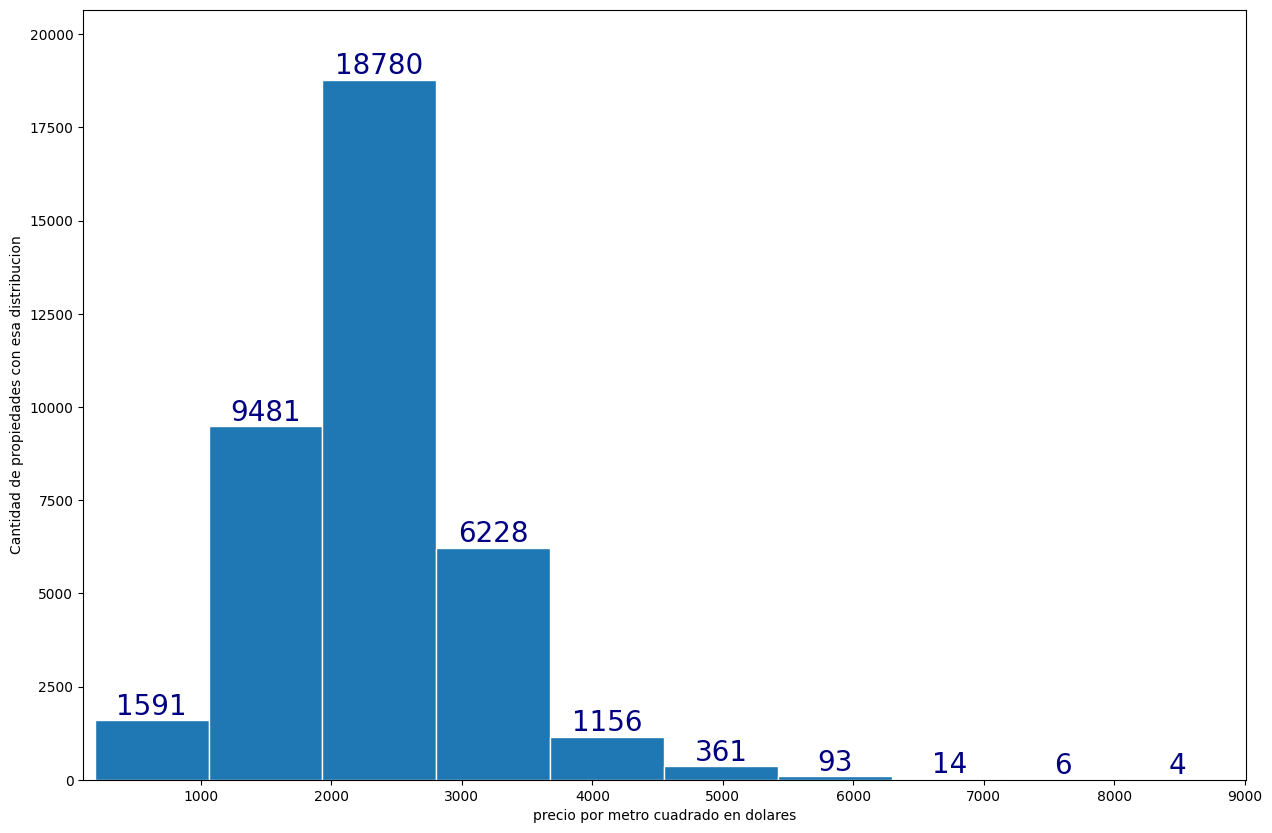

In [12]:
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(ds_properati_depto['precio_metro_cuadrado'], edgecolor='white')
plt.xlabel("precio por metro cuadrado en dolares")
plt.ylabel("Cantidad de propiedades con esa distribucion")
plt.title = ('Distrubcion precio por metro cuadrado de departamentos')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

2-Distribución de precio por metro cuadrado de casas:

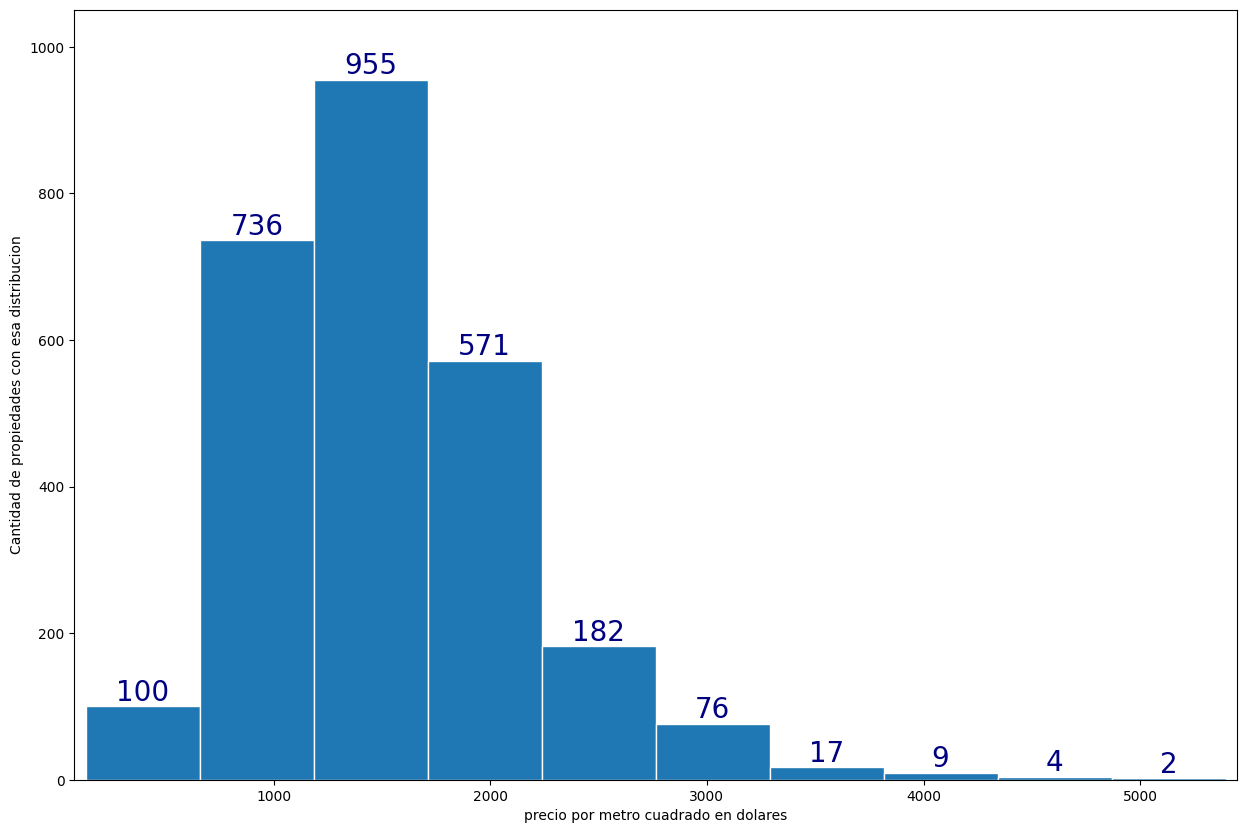

In [13]:
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(ds_properati_casa['precio_metro_cuadrado'], edgecolor='white')
plt.xlabel("precio por metro cuadrado en dolares")
plt.ylabel("Cantidad de propiedades con esa distribucion")
plt.title = ('Distrubcion precio por metro cuadrado de casas')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

3-Distribución de precio por metro cuadrado de PHs:

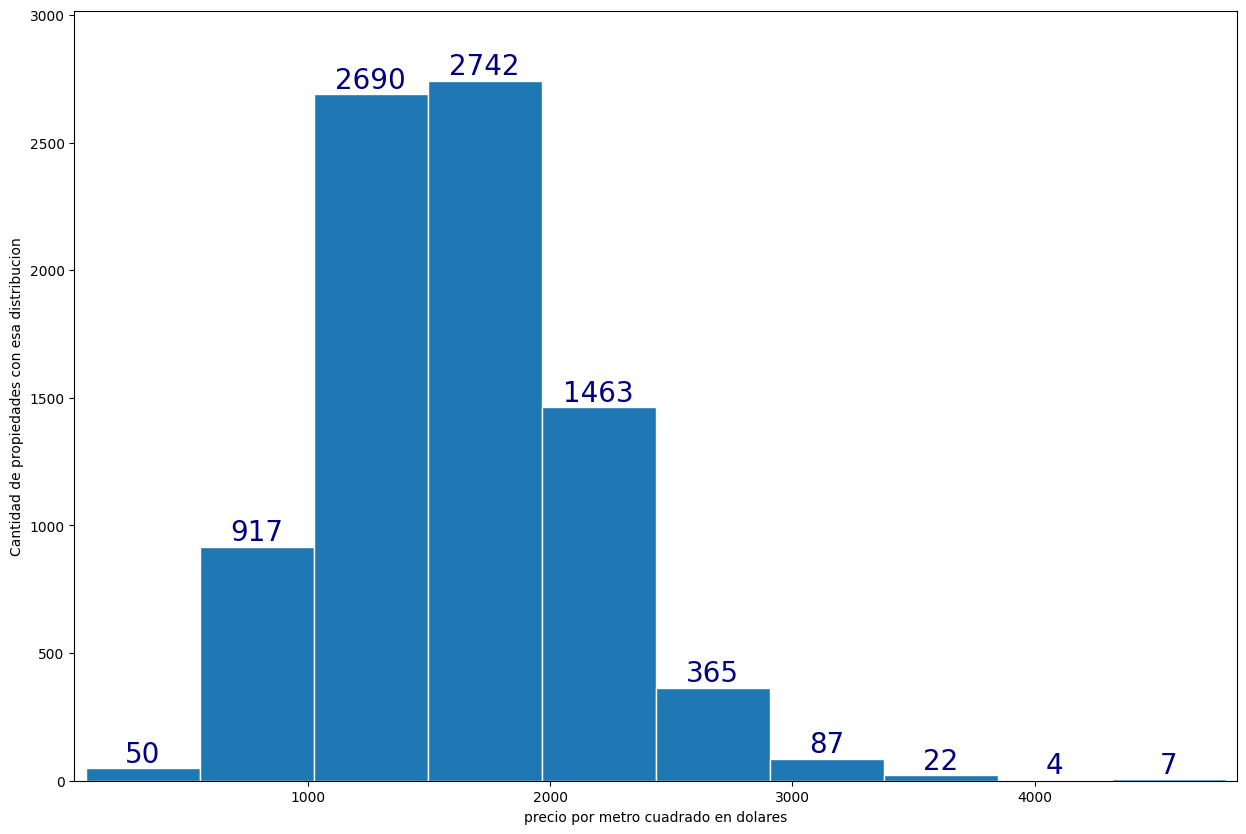

In [14]:
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(ds_properati_ph['precio_metro_cuadrado'], edgecolor='white')
plt.xlabel("precio por metro cuadrado en dolares")
plt.ylabel("Cantidad de propiedades con esa distribucion")
plt.title = ('Distrubcion precio por metro cuadrado de ph')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

### Selección de una alternativa para el análisis de la variable tipo_precio:

Se determino que la mejor alternativa para el análisis de la variable tipo_precio era trabajar la variable precio_metro_cuadrado en base al tipo_de_propiedad, separando a precio_metro_cuadrado en 3 intervalos con el 25-50-25 % de las observaciones respectivamente.

La elección de esta alternativa permite discretizar al conjunto de datos del dataset permitiendo hacer un análisis mas detallado del mismo. Al separar por tipo de propiedad se evita el problema de mezclar todos los tipos en uno solo, lo cual llevaría a hacer análisis erróneos.

Añadimos la columna "tipo_precio" al dataset original

In [15]:
ds_properati.loc[dataframe_casa_25_50_25.index,"tipo_precio"] = dataframe_casa_25_50_25["pxm2_25_50_25"] 
ds_properati.loc[dataframe_ph_25_50_25.index,"tipo_precio"] = dataframe_ph_25_50_25["pxm2_25_50_25"] 
ds_properati.loc[dataframe_depto_25_50_25.index,"tipo_precio"] = dataframe_depto_25_50_25["pxm2_25_50_25"] 

ds_properati.head()

,created_on,latitud,longitud,provincia,barrio,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,precio_metro_cuadrado,tipo_precio
0,2021-09-09,-34.631621,-58.416825,Capital Federal,BOEDO,Venta,PH,4.0,2.0,109.394701,73.0,250000.0,USD,2285.302650,alto
1,2021-09-09,-34.623886,-58.412746,Capital Federal,BOEDO,Venta,PH,2.0,1.0,61.000000,46.0,100000.0,USD,1639.344262,medio
2,2021-09-09,-34.625588,-58.423056,Capital Federal,BOEDO,Venta,PH,4.0,2.0,104.000000,54.0,185000.0,USD,1778.846154,medio
3,2021-09-09,-34.629398,-58.425852,Capital Federal,BOEDO,Venta,Departamento,2.0,1.0,62.000000,44.0,100000.0,USD,1612.903226,bajo
4,2021-09-09,-34.626595,-58.420019,Capital Federal,BOEDO,Venta,PH,4.0,3.0,111.000000,101.0,110000.0,USD,990.990991,bajo


### Gráfico CABA

Graficamos los avisos coloreados según la alternativa elegida:

In [16]:
!pip install geopandas
import geopandas as gp
from seaborn import color_palette

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


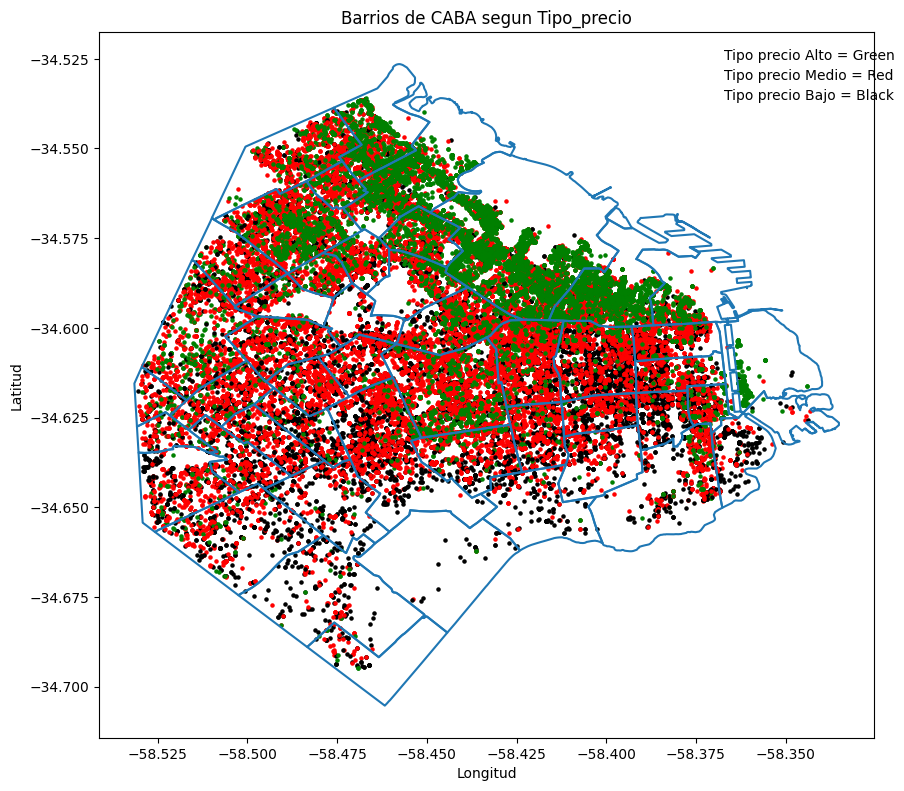

In [17]:

def points_segun_tipo(dataframe,tipo):
    dataframe_tipo = dataframe[dataframe["pxm2_25_50_25"] == tipo]
    latitud = dataframe_tipo.latitud
    longitud = dataframe_tipo.longitud
    points = gp.GeoDataFrame(dataframe_tipo, geometry=gp.points_from_xy(longitud,latitud)) 
    return points

def graficar_caba(lista_dataframe):
    fig, ax = plt.subplots(figsize=(10,10))
    poligonos = gp.read_file("barrios.geojson")
    ax.set_title('Barrios de CABA segun Tipo_precio')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    poligonos.boundary.plot(ax=ax);
    for dataframe in lista_dataframe:
        points_bajos = points_segun_tipo(dataframe,"bajo")
        points_bajos.plot(ax=ax,markersize=5,color="black")

        points_medio = points_segun_tipo(dataframe,"medio")
        points_medio.plot(ax=ax,markersize=5,color="red")

        points_alto = points_segun_tipo(dataframe,"alto")
        points_alto.plot(ax=ax,markersize=5,color="green")
    plt.figtext(.75, .82, "Tipo precio Alto = Green")
    plt.figtext(.75, .80, "Tipo precio Medio = Red")
    plt.figtext(.75, .78, "Tipo precio Bajo = Black")

    plt.show()

tres_datas = [dataframe_ph_25_50_25,dataframe_casa_25_50_25,dataframe_depto_25_50_25]
graficar_caba(tres_datas)

Compararemos esta clasificación contra el agrupamiento resultante de k-means. Para eso importamos el plot obtenido en kmeans.
![](mapaKmeans.png)

Vemos que:
- En la zona de la costanera y Puerto Madero en ambos casos está coloreada más "fuerte" indicando precios más altos.
- Por Villa Soldati y zonas adyacentes de menos recursos notamos que en ambos casos aparecen puntos de color más oscuro.
- En las zonas intermedias de la ciudad hay una mezcla de los 3 tipos.

### Entrenamiento y Predicción

En esta parte se pide predecir el valor del tipo_precio excluyendo la variable price, precio por metro cuadrado y otra que pueda contener información del precio de venta.

Para cumplir con lo pedido se hacen uso de distintos modelos que permiten predecir el valor de la variable tipo_precio:

- Árbol de decisión.

-  Random forest.

- A elección (completarrrrrrrrrrrrrrrrrrrrrrr).

Para cada uno de los modelos trabajados es necesario hacer un trabajo de transformación de datos, de forma de tener un buen rendimiento en cada modelo usado.

Importamos las librerías que usaremos

In [18]:
#modelos y métricas
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Creamos un dataset con los features que usaremos para clasificar

In [19]:
ds_properati_numerico = ds_properati.select_dtypes(include=np.number)

In [20]:
ds_properati.columns.to_list()


['created_on',
 'latitud',
 'longitud',
 'provincia',
 'barrio',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'precio_metro_cuadrado',
 'tipo_precio']

Convertimos la columna de precio_metro_cuadrado a int para usarla en el random forest.

In [21]:
# converting 'Weight' from float to int
ds_properati['precio_metro_cuadrado'] = ds_properati['precio_metro_cuadrado'].astype(int)

ds_properati_x = ds_properati_numerico.drop(['property_price','precio_metro_cuadrado'], axis='columns', inplace=False)

Creamos el dataset con la variable target

In [22]:
ds_properati_y = ds_properati['tipo_precio'].copy()

Generamos los conjuntos de train y test

In [23]:
x_train, x_test, y_train, y_test = train_test_split(ds_properati_x,
                                                    ds_properati_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2) 

### Modelo 1: Árbol de decisión

Se pide la creación de un árbol de decisión con los hiperparámetros más adecuados mediante validación cruzada.

In [24]:
#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

# Datos Entrenamiento: 34099
# Datos Prueba: 14614


Buscamos la mejor combinación de hiperparámetros.

Exploramos un espacio de búsqueda, usando k-fold Cross Validation para medir el desempeño de cada combinación. Hacemos un Random search

In [33]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
import numpy as np
import sklearn as sk

#Cantidad de combinaciones que queremos probar
n = 10 

#Conjunto de parámetros que queremos usar
params = {'criterion':['gini','entropy'],
               'min_samples_leaf':list(range(1,10)),
               'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0,0.05,n), 
               'max_depth':list(range(1,6)),
               'random_state': [0,0]
               }
                
#Cantidad de splits para el Cross Validation
folds = 5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score, average='micro')

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n, error_score='raise') 

#Buscamos los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise', estimator=DecisionTreeClassifier(),
                   param_distributions={'ccp_alpha': array([0.        , 0.00555556, 0.01111111, 0.01666667, 0.02222222,
       0.02777778, 0.03333333, 0.03888889, 0.04444444, 0.05      ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19],
                                        'random_state': [0, 0]},
                   scoring=make_scorer(f1_score, average=micro))

In [34]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)

#Mejor métrica
print(randomcv.best_score_)
#Mejor metrica nos tira nan

{'random_state': 0, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_depth': 3, 'criterion': 'entropy', 'ccp_alpha': 0.011111111111111112}
0.544971867891982


Creamos un clasificador con los hiperparámetros resultantes de CV

In [ ]:
"""tree_model = tree.DecisionTreeClassifier(criterion="entropy",
                                         max_depth = 20, 
                                         min_samples_leaf=10) 
#Entrenamos el modelo
model = tree_model.fit(X = x_train, y = y_train)"""

In [ ]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol=DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Entreno el arbol en todo el set
arbol.fit(x_train,y_train)

#reglas = export_text(arbol, feature_names=list(features))
#print(reglas)

DecisionTreeClassifier(ccp_alpha=0.011111111111111112, max_depth=2,
                       min_samples_leaf=6, min_samples_split=15,
                       random_state=0)

Matriz de confusión y performance

In [ ]:
#Evalúo el Arbol con los mejores hiperparámetros
from sklearn.metrics import confusion_matrix, classification_report , f1_score

#Hago predicción sobre el set de evaluacion
y_pred= arbol.predict(x_test)

#Arbol Reporte y Matriz de Confusion
#print(classification_report(y_test,y_pred))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary'))) #binary considera la clase positiva por defecto 1

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

### Modelo 2: Random Forest

Cada árbol se construye así:

Dado que el número de casos en el conjunto de entrenamiento es N. Una muestra de esos N casos se toma aleatoriamente pero CON REEMPLAZO. Esta muestra será el conjunto de entrenamiento para construir el árbol i.

Si existen M varibles de entrada, un número m < M se especifica tal que para cada nodo, m variables se seleccionan aleatoriamente de M. La mejor división de estos m atributos es usado para ramificar el árbol. El valor m se mantiene constante durante la generación de todo el bosque.

Cada árbol crece hasta su máxima extensión posible y NO hay proceso de poda. Nuevas instancias se predicen a partir de la agregación de las predicciones de los x árboles (i.e., mayoría de votos para clasificación, promedio para regresión)

Importamos todas las librerías que vamos a necesitar

In [26]:
!pip install 'dtreeviz'

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 KB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 KB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 KB 21.5 MB/s eta 0:00:00
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=0af02eb874487c686f55fd109e6e0ea56f661fec4a9d5e3a40f333413ba103fa
  Stored in directory: /root/.cache/pip/wheels/94/4d/ca/df6b7427d49df660c50c351242463476c3f7935c359402e42b
Successfully built dtreeviz
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Creamos el clasificador y entreno el modelo

In [27]:
rfc_default = RandomForestClassifier()
rfc_default.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [28]:
#Creamos un clasificador con hiperparámetros arbitrarios
rfc = RandomForestClassifier(max_features='auto', 
                             oob_score=True, 
                             random_state=2, 
                             n_jobs=-1, 
                             min_samples_leaf=5,
                             min_samples_split=5,
                             n_estimators=50 )
#Entrenamos el modelo
model = rfc.fit(X = x_train, y = y_train)

Realizamos una prediccion sobre el set de test y mostramos

In [29]:
y_pred = model.predict(x_test)
y_pred

array(['bajo', 'alto', 'medio', ..., 'medio', 'medio', 'medio'],
      dtype=object)

y lo comparamos con los valores reales

In [30]:
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

,test,pred
0,medio,bajo
1,medio,alto
2,bajo,medio
3,alto,alto
4,medio,medio


Mostramos a traves de una matriz de heatmap cuantos aciertos y cuantas fallas hubo.

Text(50.722222222222214, 0.5, 'True')

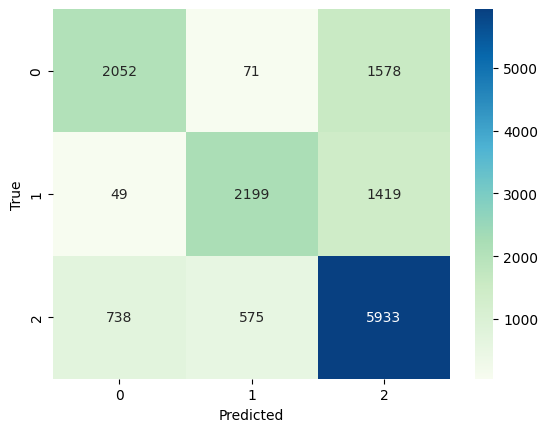

In [32]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Busqueda de Hiperparámetros mediante k-fold Cross Validation


Usamos 5 folds para la busqueda de hiperparametros

In [35]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

#Cantidad de combinaciones que quiero porbar
n=10 

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               #'min_samples_leaf':list(range(1,10)),
               #'min_samples_split': list(range(2,20)),
               'ccp_alpha':np.linspace(0,0.05,n), 
               'max_depth':list(range(1,6))}
                
#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n) 

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train,y_train);

In [36]:
#Mejores hiperparametros del arbol
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'max_depth': 1, 'criterion': 'gini', 'ccp_alpha': 0.044444444444444446}
nan


Entrenamos el arbol para encontrar el mejor arbol

In [ ]:
#Entrenamiento con 10 Fold Cross Validation 
from sklearn.model_selection import cross_validate, StratifiedKFold

# Spits que respeten la proporción delas clases
kfoldcv =StratifiedKFold(n_splits=10) 
 
#Creo árbol con los mejores hiperparámetros 
arbolcv=DecisionTreeClassifier()#.set_params(**randomcv.best_params_)

#Selecciono métrica F1-Score
scorer_fn = make_scorer(sk.metrics.f1_score)

#Hago CV
resultados = cross_validate(arbolcv,x_train, y_train, cv=kfoldcv,scoring=scorer_fn,return_estimator=True)

#Selecciono el arbol con mejor performance
metricsCV=resultados['test_score']
mejor_performance=resultados['estimator'][np.where(metricsCV==max(metricsCV))[0][0]]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fcb02109-3268-4805-81b4-1fba96795907' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>